<a href="https://colab.research.google.com/github/ash0411/guided_project/blob/master/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

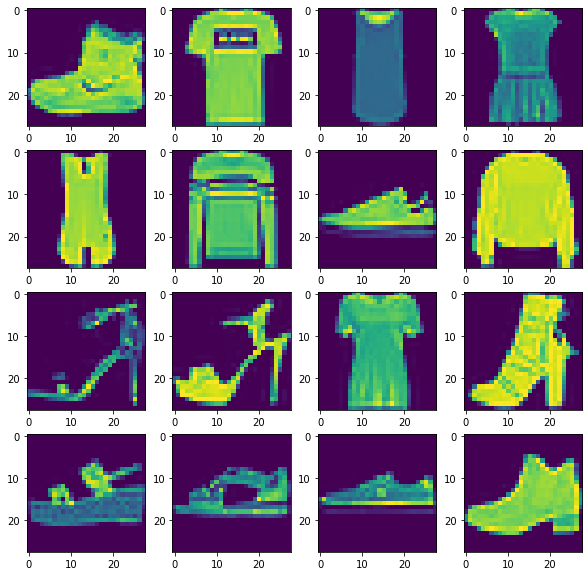

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [0]:
import numpy as np
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

In [0]:
x_train = x_train/255
x_test =x_test/255

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.regularizers import l2
nodes = 64
def create_model(weight_reg = False,dropout_reg = False):
  model = Sequential()
  if weight_reg:
    model.add(Dense(nodes,activation = 'relu',input_shape = (784,),kernel_regularizer = l2(0.001)))
    model.add(Dense(nodes,activation = 'relu',kernel_regularizer = l2(0.001)))
  else:
    model.add(Dense(nodes,activation = 'relu',input_shape = (784,)))
    model.add(Dense(nodes,activation = 'relu',))
  if dropout_reg:
    model.add(Dropout(0.2))
  model.add(Dense(10,activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  model.summary()
  return model    

In [0]:
def shot_acc(h,E):
  plt.plot(range(E),h.history['accuracy'],label ="training")
  plt.plot(range(E),h.history['val_accuracy'],label = "validation")
  plt.ylim(0.7,1)
  plt.legend()
  plt.show()
  return

In [0]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(
    on_epoch_end = lambda e,l:print(e,end='.')
)
def run_experiment(E =20,weight_reg = False,dropout_reg = False):
  m= create_model(weight_reg,dropout_reg)
  h = m.fit(
      x_train,y_train,
      epochs = E,verbose = False,
      validation_data= (x_test,y_test),
      callbacks = [simple_log]
  )
  shot_acc(h,E)
  return

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

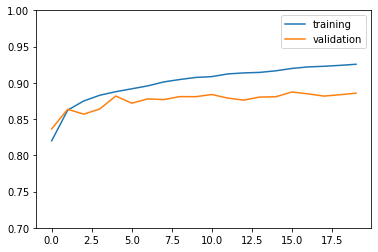

In [37]:
run_experiment()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

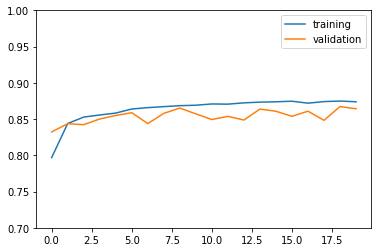

In [38]:
run_experiment(weight_reg = True,dropout_reg= True)

NameError: ignored